In [1]:
# Dependencies and Setup
%matplotlib inline
%config InlineBackend.figure_format='svg'
from IPython.display import display,HTML
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from prettypandas import PrettyPandas
sns.set_style("ticks")
sns.set_context(context="notebook",font_scale=1)

In [2]:
# Read CSV
#2013 UK
competent_authority_df_2013_uk = pd.read_csv("uk-human-trafficking-data/2013_competent_authority.csv")
country_of_referral_df_2013_uk = pd.read_csv("uk-human-trafficking-data/2013_country_of_referral.csv")
exploitation_type_df_2013_uk = pd.read_csv("uk-human-trafficking-data/2013_exploitation_type.csv")
referrals_adult_df_2013_uk = pd.read_csv("uk-human-trafficking-data/2013_referrals_adult.csv")
referrals_all_df_2013_uk = pd.read_csv("uk-human-trafficking-data/2013_referrals_all.csv")
referrals_minor_df_2013_uk = pd.read_csv("uk-human-trafficking-data/2013_referrals_minor.csv")
referring_agency_df_2013_uk = pd.read_csv("uk-human-trafficking-data/2013_referring_agency.csv")

#2014 UK
competent_authority_df_2014_uk = pd.read_csv("uk-human-trafficking-data/2014_competent_authority.csv")
country_of_referral_df_2014_uk = pd.read_csv("uk-human-trafficking-data/2014_country_of_referral.csv")
exploitation_type_df_2014_uk = pd.read_csv("uk-human-trafficking-data/2014_exploitation_type.csv")
referrals_adult_df_2014_uk = pd.read_csv("uk-human-trafficking-data/2014_referrals_adult.csv")
referrals_all_df_2014_uk = pd.read_csv("uk-human-trafficking-data/2014_referrals_all.csv")
referrals_minor_df_2014_uk = pd.read_csv("uk-human-trafficking-data/2014_referrals_minor.csv")
referring_agency_df_2014_uk = pd.read_csv("uk-human-trafficking-data/2014_referring_agency.csv")

#2013 USA
eports_of_arrestees_for_human_trafficking_by_age_and_sex_2013_usa = pd.read_csv("ucr-human-trafficking-2013/data/reports_of_arrestees_for_human_trafficking_by_age_and_sex_2013.csv")
reports_of_offenses_of_human_trafficking_2013_usa = pd.read_csv("ucr-human-trafficking-2013/data/reports_of_offenses_of_human_trafficking_2013.csv")
state_participation_in_the_ucr_human_trafficking_data_collection_2013_usa = pd.read_csv("ucr-human-trafficking-2013/data/state_participation_in_the_ucr_human_trafficking_data_collection_2013.csv")

#2014 USA
tbl01_df_2014_usa = pd.read_csv("ucr-human-trafficking-2014/data/14tbl01.csv")
tbl02_df_2014_usa = pd.read_csv("ucr-human-trafficking-2014/data/14tbl02.csv")
tbl03_df_2014_usa = pd.read_csv("ucr-human-trafficking-2014/data/14tbl03.csv")
tbl04_df_2014_usa = pd.read_csv("ucr-human-trafficking-2014/data/14tbl04.csv")
tbl05_df_2014_usa = pd.read_csv("ucr-human-trafficking-2014/data/14tbl05.csv")

#update Colum names
tbl02_df_2014_usa.rename(columns={'column_a': 'state', 'offenses': 'offenses_Commercial_sex_act', 'total_cleared': 'total_cleared_Commercial_sex_act', 'clearances_under_18': 'clearances_under_18_Commercial_sex_act', 'offenses_2': 'offenses_Involuntary_servitude', 'total_cleared_2': 'total_cleared_Involuntary_servitude', 'clearances_under_18_2': 'clearances_under_18_Involuntary_servitude', 'offenses_3': 'offenses_total', 'total_cleared_3': 'total_cleared_total', 'clearances_under_18_3': 'clearances_under_18_total'}, inplace=True)
tbl03_df_2014_usa.rename(columns={'column_a': 'state', 'column_b': 'Offense', 'column_c': 'Male_juv', 'column_d': 'Female_juv','column_e': 'Male_total', 'column_f': 'Female_adult'}, inplace=True)
tbl04_df_2014_usa.rename(columns={'column_a': 'state', 'column_b': 'Offense', 'column_c': 'white_juv', 'column_d': 'black_or_african_american_juv','column_e': 'American_indian_or_Alska_native_juv', 'column_f': 'Asian_juv', 'column_g': 'Native_Hawaiian_orother_Pacific_Islander_juv','column_h': 'Total_juv','column_i': 'white_adult', 'column_j': 'black_or_african_american_adult','column_k': 'American_indian_or_Alska_native_adult', 'column_l': 'Asian_adult', 'column_m': 'Native_Hawaiian_orother_Pacific_Islander_adult','column_n': 'Total_adult'}, inplace=True)
tbl05_df_2014_usa.rename(columns={'column_a': 'state', 'column_b': 'Offense', 'column_c': 'Hispanic_or_Latino_juv', 'column_d': 'Not_Hispanic_or_Latino_juv','column_e': 'Toral_juv', 'column_f': 'Hispanic_or_Latino_adult', 'column_g': 'Not_Hispanic_or_Latino','column_h': 'Total_adult'}, inplace=True)



In [3]:
country_of_referral_df_2013_uk['UID'] = country_of_referral_df_2013_uk.index
country_of_referral_df_2013_uk_drop = country_of_referral_df_2013_uk.drop([4])
country_of_referral_df_2013_uk_drop.head()

,Country of NRM referral,Female,Male,Total,% Total,2012 - 2013% Change,UID
0,England,994,562,1556,89%,49%,0
1,Northern Ireland,25,16,41,2%,173%,1
2,Scotland,65,34,99,6%,3%,2
3,Wales,38,12,50,3%,47%,3


  Country of NRM referral  Female
0                 England     994
1        Northern Ireland      25
2                Scotland      65
3                   Wales      38


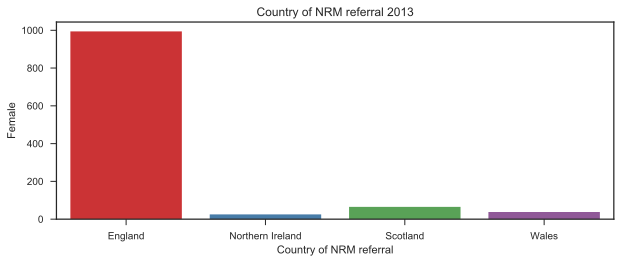

In [4]:
plt.figure(figsize=(10,7*0.5186))
temp_df = country_of_referral_df_2013_uk_drop.groupby(["Country of NRM referral"]).agg({"Female":"mean"}).reset_index()
print(temp_df.head())
ax_sns1 = sns.barplot(x = "Country of NRM referral",
            y="Female",
            data = country_of_referral_df_2013_uk_drop, 
            dodge = False,
            palette = "Set1",
            ci = None)
ax_sns1.set_title('Country of NRM referral 2013')
plt.show()

ax_sns1.figure.savefig("country_of_referral_df_2013_uk.png", dpi=150)

In [5]:
exploitation_type_df_2013_uk['UID'] = exploitation_type_df_2013_uk.index
exploitation_type_df_2013_uk = exploitation_type_df_2013_uk.drop([9, 10])
exploitation_type_df_2013_uk

,Claimed exploitation Type,Female,Male,Total,2012 - 2013 Change,UID
0,Adult - Domestic Servitude,125,16,141,18%,0
1,Adult - Labour Exploitation,124,387,511,89%,1
2,Adult - Sexual Exploitation,563,18,581,53%,2
3,Adult - Unknown exploitation,42,20,62,44%,3
4,Minor - Domestic Servitude,37,8,45,2%,4
5,Minor - Labour Exploitation,33,90,123,24%,5
6,Minor - Sexual Exploitation (non-UK national),78,10,88,11%,6
7,Minor - Sexual Exploitation (UK national),50,6,56,155%,7
8,Minor - Unknown exploitation type,69,69,138,9%,8


                       Claimed exploitation Type  Total
4                     Minor - Domestic Servitude     45
5                    Minor - Labour Exploitation    123
6      Minor - Sexual Exploitation (UK national)     56
7  Minor - Sexual Exploitation (non-UK national)     88
8              Minor - Unknown exploitation type    138


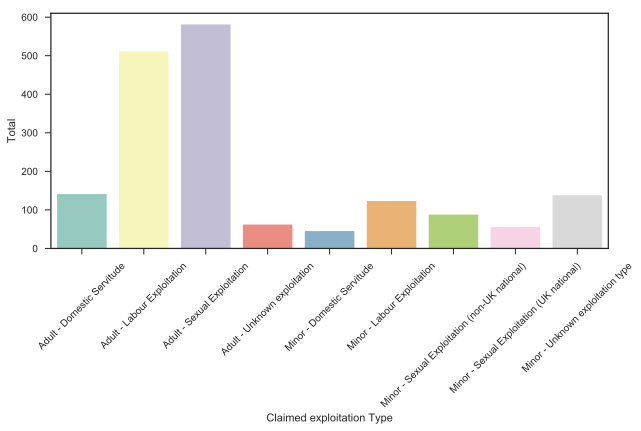

In [10]:
plt.figure(figsize=(10,7*0.6186))
temp_df = exploitation_type_df_2013_uk.groupby(["Claimed exploitation Type"]).agg({"Total":"mean"}).reset_index()
print(temp_df.tail())
ax_sns2 = sns.barplot(x = "Claimed exploitation Type", 
            y="Total", 
            data = exploitation_type_df_2013_uk,
            dodge = False, 
            palette = "Set3", 
           ci = None)
ax_sns1.set_title('Claimed exploitation Type 2013')
plt.xticks(rotation=45)
plt.show()
ax_sns2.figure.savefig("exploitation_type_df_2013_uk.png", dpi=150)